In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score


from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pickle

In [2]:
df = pd.read_csv("../data/final_data.csv")

In [3]:
df.head()

,type,product,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
0,cookie,Beryl's Chocolate Orange Cashew Nuts Cookies,1.769231,2.923077,NaN
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,7.071429,3.642857,NaN
2,cookie,Beryl's Cookies Chocolate Sable,0.288000,0.368000,NaN
3,cookie,Beryl's Strawberry Sable,6.714286,3.428571,NaN
4,cookie,Beryl's Cookies Exquisite Selection (Tin),2.352941,2.941176,NaN


In [4]:
df.describe()

,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
count,90.000000,85.000000,80.000000
mean,0.483587,0.461762,0.003506
std,1.178523,1.169641,0.002620
min,0.000000,0.000000,0.000000
25%,0.206897,0.080000,0.002107
50%,0.250000,0.240000,0.003456
75%,0.272045,0.340000,0.004619
max,7.071429,9.250000,0.018750


In [5]:
#impute missing values with 0

new_df = df.fillna(0)

In [6]:
new_df.describe()

,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
count,95.000000,95.000000,95.000000
mean,0.458135,0.413155,0.002952
std,1.151878,1.114817,0.002724
min,0.000000,0.000000,0.000000
25%,0.196154,0.039231,0.000333
50%,0.241176,0.200000,0.003100
75%,0.270000,0.333333,0.004357
max,7.071429,9.250000,0.018750


In [7]:
# Label any with metrics > 50th percentile of the dataset as unhealthy
def classify_snack(dataframe):
    condition = (
        ((dataframe['total_fat_g_per_gram_of_serving'] > 0.241176) | 
        (dataframe['sugars_g_per_gram_of_serving'] > 0.2)) &
        (dataframe['sodium_g_per_gram_of_serving'] > 0.003100)
    )
    dataframe['class'] = 1  # 1 means healthy, assign all as healthy first
    dataframe.loc[condition, 'class'] = 0  # 0 means unhealthy

# Call the function to classify snacks
classify_snack(new_df)

In [8]:
new_df.groupby("class")['class'].count()

class
0    34
1    61
Name: class, dtype: int64

In [9]:
new_df.head()

,type,product,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving,class
0,cookie,Beryl's Chocolate Orange Cashew Nuts Cookies,1.769231,2.923077,0.0,1
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,7.071429,3.642857,0.0,1
2,cookie,Beryl's Cookies Chocolate Sable,0.288000,0.368000,0.0,1
3,cookie,Beryl's Strawberry Sable,6.714286,3.428571,0.0,1
4,cookie,Beryl's Cookies Exquisite Selection (Tin),2.352941,2.941176,0.0,1


In [10]:
# Using KNN Imputer
#categories = df[['type']]
#categories_dummies = pd.get_dummies(categories, drop_first=True)

#new_df = df.drop(['type','product'], axis=1)
#new_df = pd.concat([new_df, categories_dummies], axis=1)

# Normalise the data to prepare for imputation using KNN
#scaler = MinMaxScaler()
#new_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)

#imputer = KNNImputer(n_neighbors=5)
#new_df = pd.DataFrame(imputer.fit_transform(new_df),columns = new_df.columns)

In [11]:
new_df.head()

,type,product,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving,class
0,cookie,Beryl's Chocolate Orange Cashew Nuts Cookies,1.769231,2.923077,0.0,1
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,7.071429,3.642857,0.0,1
2,cookie,Beryl's Cookies Chocolate Sable,0.288000,0.368000,0.0,1
3,cookie,Beryl's Strawberry Sable,6.714286,3.428571,0.0,1
4,cookie,Beryl's Cookies Exquisite Selection (Tin),2.352941,2.941176,0.0,1


In [12]:
categories = new_df[['type']]
categories_dummies = pd.get_dummies(categories, drop_first=True)

In [13]:
new_df

,type,product,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving,class
0,cookie,Beryl's Chocolate Orange Cashew Nuts Cookies,1.769231,2.923077,0.000000,1
1,cookie,Beryl's Coconut Sable with Macadamia Nuts,7.071429,3.642857,0.000000,1
2,cookie,Beryl's Cookies Chocolate Sable,0.288000,0.368000,0.000000,1
3,cookie,Beryl's Strawberry Sable,6.714286,3.428571,0.000000,1
4,cookie,Beryl's Cookies Exquisite Selection (Tin),2.352941,2.941176,0.000000,1
...,...,...,...,...,...,...
90,wafer,Loacker Quadratini Crispy Wafers - Napolitaner,0.270000,0.000000,0.000000,1
91,wafer,Loacker Quadratini Crispy Wafers - Tiramisu,0.293333,0.000000,0.000000,1
92,wafer,Lee Biscuits Carton - 24 Pack Chocolate Cream ...,0.296667,0.341111,0.000544,1
93,wafer,Lee Biscuits Carton - 24 Pack Lemon Cream Wafe...,0.283333,0.230000,0.000689,1


In [14]:
new_df = new_df.drop(['type','product'], axis=1)
new_df = pd.concat([new_df, categories_dummies], axis=1)

In [15]:
new_df.head()

,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving,class,type_crackers,type_cream,type_wafer
0,1.769231,2.923077,0.0,1,0,0,0
1,7.071429,3.642857,0.0,1,0,0,0
2,0.288000,0.368000,0.0,1,0,0,0
3,6.714286,3.428571,0.0,1,0,0,0
4,2.352941,2.941176,0.0,1,0,0,0


In [16]:
X = new_df.drop(['class'], axis=1)
y = new_df['class']

In [28]:
X.head()

,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving,type_crackers,type_cream,type_wafer
0,1.769231,2.923077,0.0,0,0,0
1,7.071429,3.642857,0.0,0,0,0
2,0.288000,0.368000,0.0,0,0,0
3,6.714286,3.428571,0.0,0,0,0
4,2.352941,2.941176,0.0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) 

In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.model_selection import KFold

pipelines = []
pipelines.append(('LogReg', LogisticRegression()))
pipelines.append(('KNN' ,KNeighborsClassifier()))
pipelines.append(('DT' ,DecisionTreeClassifier()))
pipelines.append(('BerNB' ,BernoulliNB()))
pipelines.append(('GausNB' ,GaussianNB()))
pipelines.append(('RandForest',RandomForestClassifier()))
pipelines.append(('BaggingDT',BaggingClassifier()))

model_name = []
results = []
for pipe ,model in pipelines:
    #kfold = KFold(n_splits=5, shuffle=True,random_state=42)
    #crossv_results = cross_val_score(model , X_train_resampled ,y_train_resampled ,cv =kfold , scoring='accuracy')
    #crossv_results_test = cross_val_score(model , X_test ,y_test,cv =kfold , scoring='accuracy')
    model_created = model.fit(X_train_resampled,y_train_resampled)
    #results.append(crossv_results)
    #model_name.append(pipe)
    #msg = "Train %s-> cross_val_accuracy: %f cross_val_std:(%f)" % (model, crossv_results.mean(), crossv_results.std())
    #msg_1 = "Test %s-> cross_val_accuracy: %f cross_val_std:(%f)" % (model, crossv_results_test.mean(), crossv_results_test.std())
    msg = model
    msg_1 = "Train classification report"
    msg_2 = "Test classification report"
    
    print(msg)
    print(msg_1)
    print(classification_report(y_train, model_created.predict(X_train)))
    print(msg)
    print(msg_2)
    print(classification_report(y_test, model_created.predict(X_test)))
    print("===========================================")
    

LogisticRegression()
Train classification report
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        24
           1       0.69      0.82      0.75        33

    accuracy                           0.68        57
   macro avg       0.68      0.66      0.66        57
weighted avg       0.68      0.68      0.67        57

LogisticRegression()
Test classification report
              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.75      0.75      0.75        28

    accuracy                           0.63        38
   macro avg       0.53      0.53      0.53        38
weighted avg       0.63      0.63      0.63        38

KNeighborsClassifier()
Train classification report
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        24
           1       0.95      0.55      0.69        33

    accuracy                      

### Modelling with just Total_fats, sugars and sodium

In [21]:
X1 = new_df.drop(['class','type_crackers','type_cream','type_wafer'], axis=1)
y1 = new_df['class']

In [27]:
X1.head()

,total_fat_g_per_gram_of_serving,sugars_g_per_gram_of_serving,sodium_g_per_gram_of_serving
0,1.769231,2.923077,0.0
1,7.071429,3.642857,0.0
2,0.288000,0.368000,0.0
3,6.714286,3.428571,0.0
4,2.352941,2.941176,0.0


In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state = 42) 

In [23]:
smote = SMOTE(random_state=42)
X1_train_resampled, y1_train_resampled = smote.fit_resample(X1_train, y1_train)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.model_selection import KFold

pipelines = []
pipelines.append(('LogReg', LogisticRegression()))
pipelines.append(('KNN' ,KNeighborsClassifier()))
pipelines.append(('DT' ,DecisionTreeClassifier()))
pipelines.append(('BerNB' ,BernoulliNB()))
pipelines.append(('GausNB' ,GaussianNB()))
pipelines.append(('RandForest',RandomForestClassifier()))
pipelines.append(('BaggingDT',BaggingClassifier()))

model_name = []
results = []
for pipe ,model in pipelines:
    #kfold = KFold(n_splits=5, shuffle=True,random_state=42)
    #crossv_results = cross_val_score(model , X_train_resampled ,y_train_resampled ,cv =kfold , scoring='accuracy')
    #crossv_results_test = cross_val_score(model , X_test ,y_test,cv =kfold , scoring='accuracy')
    model_created = model.fit(X1_train_resampled,y1_train_resampled)
    #results.append(crossv_results)
    #model_name.append(pipe)
    #msg = "Train %s-> cross_val_accuracy: %f cross_val_std:(%f)" % (model, crossv_results.mean(), crossv_results.std())
    #msg_1 = "Test %s-> cross_val_accuracy: %f cross_val_std:(%f)" % (model, crossv_results_test.mean(), crossv_results_test.std())
    msg = model
    msg_1 = "Train classification report"
    msg_2 = "Test classification report"
    
    print(msg)
    print(msg_1)
    print(classification_report(y1_train, model_created.predict(X1_train)))
    print(msg)
    print(msg_2)
    print(classification_report(y1_test, model_created.predict(X1_test)))
    print("===========================================")
    

LogisticRegression()
Train classification report
              precision    recall  f1-score   support

           0       0.42      0.54      0.47        24
           1       0.58      0.45      0.51        33

    accuracy                           0.49        57
   macro avg       0.50      0.50      0.49        57
weighted avg       0.51      0.49      0.49        57

LogisticRegression()
Test classification report
              precision    recall  f1-score   support

           0       0.32      0.60      0.41        10
           1       0.79      0.54      0.64        28

    accuracy                           0.55        38
   macro avg       0.55      0.57      0.53        38
weighted avg       0.66      0.55      0.58        38

KNeighborsClassifier()
Train classification report
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.85      0.70      0.77        33

    accuracy                      

### K-Means clustering

In [30]:
df_clustering = new_df[['total_fat_g_per_gram_of_serving','sugars_g_per_gram_of_serving','sodium_g_per_gram_of_serving']]

In [33]:
scaler = StandardScaler().fit(df_clustering)
scaled_df = scaler.transform(df_clustering)

In [34]:
df_clustering_features = df_clustering.columns

In [35]:
df_clustering_features 

Index(['total_fat_g_per_gram_of_serving', 'sugars_g_per_gram_of_serving',
       'sodium_g_per_gram_of_serving'],
      dtype='object')

In [45]:
# Instantiate a clustering object with a pre-determined number of clusters
clustering = KMeans(n_clusters=2, max_iter=500, random_state=42)

# fit model to data set and learn its statistical parameters (mean, variance)
# apply kmeans clustering with 3 clusters to the input data from X
# clustering itself happens with the fit method
clustering.fit(scaled_df)

/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2, random_state=42)

Text(0.5, 1.0, 'K-means clustering')

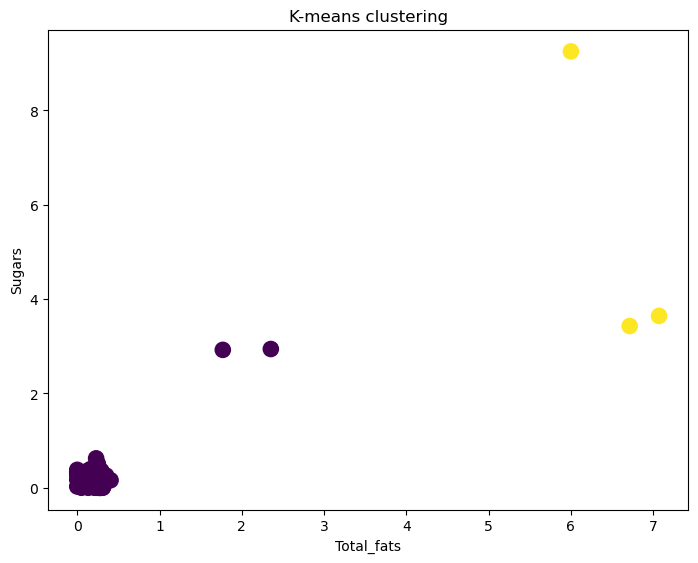

In [46]:
# create visualisation of clustering results
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

# set colours to represent respective model labels
colors = clustering.labels_

#unscaled the data for visualisation
df_unscaled = scaler.inverse_transform(scaled_df)

# display scatter plot at column index = 2 and column index = 1
# c refers to label colours which equal to model labels in this case
# s refers to the size of the scatter plot
ax.scatter(df_unscaled[:,0], df_unscaled[:,1], c=colors, s=120)
# plotting fat vs sugars

# set labels for axes
ax.set_xlabel('Total_fats')
ax.set_ylabel('Sugars')

# set title fror scatter plot
plt.title('K-means clustering')

Text(0.5, 1.0, 'K-means clustering')

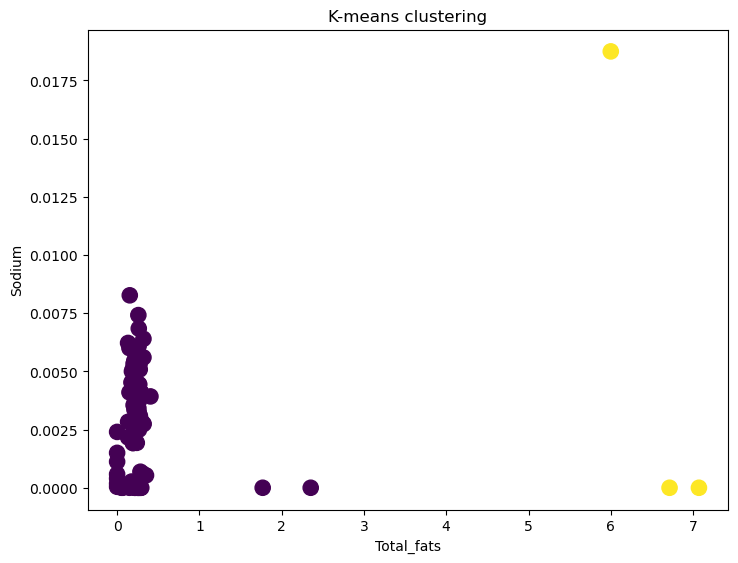

In [47]:
# create visualisation of clustering results
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

# set colours to represent respective model labels
colors = clustering.labels_

#unscaled the data for visualisation
df_unscaled = scaler.inverse_transform(scaled_df)

# display scatter plot at column index = 2 and column index = 1
# c refers to label colours which equal to model labels in this case
# s refers to the size of the scatter plot
ax.scatter(df_unscaled[:,0], df_unscaled[:,2], c=colors, s=120)
# plotting fat vs sodium

# set labels for axes
ax.set_xlabel('Total_fats')
ax.set_ylabel('Sodium')

# set title fror scatter plot
plt.title('K-means clustering')

Text(0.5, 1.0, 'K-means clustering')

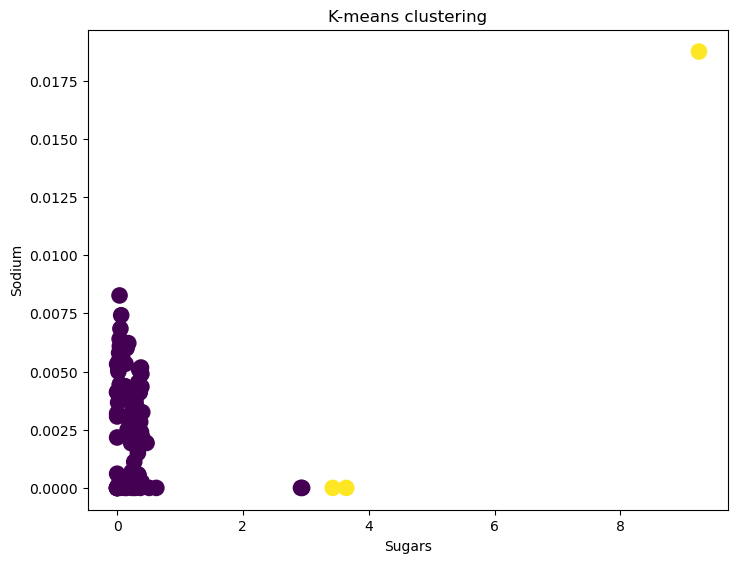

In [48]:
# create visualisation of clustering results
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

# set colours to represent respective model labels
colors = clustering.labels_

#unscaled the data for visualisation
df_unscaled = scaler.inverse_transform(scaled_df)

# display scatter plot at column index = 2 and column index = 1
# c refers to label colours which equal to model labels in this case
# s refers to the size of the scatter plot
ax.scatter(df_unscaled[:,1], df_unscaled[:,2], c=colors, s=120)
# plotting sugars vs sodium

# set labels for axes
ax.set_xlabel('Sugars')
ax.set_ylabel('Sodium')

# set title fror scatter plot
plt.title('K-means clustering')

/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liche

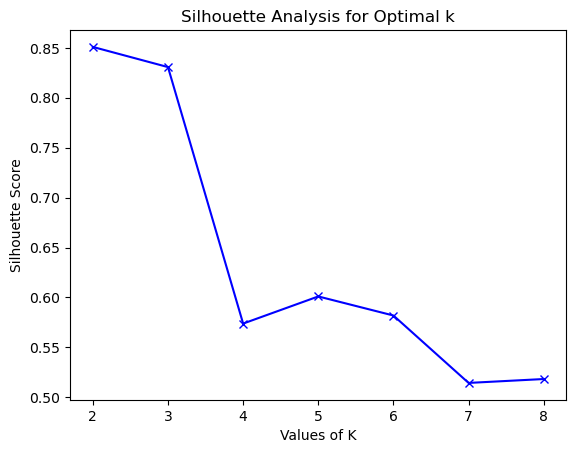

In [51]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for num_clusters in range_n_clusters:
 
    # instantiate and fit kmeans model for each k value
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
 
    # generate silhouette score
    silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Silhouette score : choose the highest score.